## Data Preparation

In [1080]:
# Import relevant libraries
import pandas as pd # loading and manipulating data
import matplotlib.pyplot as plt # for visualization
import numpy as np # working with arrays/performing statistical analysis
import seaborn as sns # making statistical graphics/visualizations
import folium # plotting maps
from datetime import datetime # module to work with dates and time
import matplotlib.dates as mdates # to plot dates and time

In [1081]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # This tells Jupyter to print the results for any variable or statement on it’s own line.

# Create dataframes for the data
pcd = pd.read_excel('Metadata/pcd.xlsx')
pcr = pd.read_excel('Metadata/pcr.xlsx')
audio = pd.read_excel('Metadata/audio.xlsx')
locations = pd.read_excel('Metadata/locations.xlsx')

# Display first few rows of each dataframe
pcd.head()
pcr.head()
audio.head()
locations.head()

,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual
0,18_03_06_1,E100 edge,NaN,10.0,00:00:00,10:15:00,A
1,18_03_06_1,E100 edge,Fluffy-backed Tit-babbler,NaN,00:00:07,10:15:07,A
2,18_03_06_1,E100 edge,Blue-eared Barbet,60.0,00:00:37,10:15:37,A
3,18_03_06_1,E100 edge,Chestnut-winged Babbler,100.0,00:00:50,10:15:50,A
4,18_03_06_1,E100 edge,Blue-eared Barbet,30.0,00:00:54,10:15:54,A


,Point_count_ID,Audio_file,Site,Date,Time,Weather
0,18_03_06_1,PC0000_0003,E100 edge,2018-03-06,10:15:00,sun
1,18_03_06_2,PC0000_0004,E100 edge,2018-03-06,11:00:00,sun
2,18_03_06_3,PC0000_0005,E100 edge,2018-03-06,12:00:00,sun
3,18_03_06_4,PC0000_0006,E100 edge,2018-03-06,13:00:00,sun
4,18_03_06_5,PC0000_0007,E100 edge,2018-03-06,14:00:00,sun


,Audio_file,Site,Audio_moth_ID,Tree,Setup_date,Setup_time,Collect_date,Collect_time
0,AM0008A,B1,AM3,recorder tree,2019-01-04,20:45:00,2019-01-09,21:25:00
1,AM0003A,D100 641,AM11,recorder tree,2018-12-24,12:20:00,2018-12-27,21:35:00
2,AM0013B,B1,AM6,10m further,2019-01-10,02:45:00,2019-01-22,03:38:00
3,AM0003B,D100 641,AM13,10m further,2018-12-24,12:20:00,2018-12-27,21:35:00
4,AM0004A,D Matrix,AM13,recorder tree,2018-12-28,03:55:00,2018-12-31,10:32:00


,Location name,Latitude,Longitude,Type,Elevation
0,E100 edge,4.68392,117.58604,Transect,379
1,D100 641,4.71129,117.58753,Transect,479
2,C10 621,4.71118,117.61899,Transect,403
3,B10,4.72747,117.61433,Transect,352
4,E1 648,4.69372,117.58118,Transect,428


## Mapping the Locations where the Species were Observed

Let's plot a map with the locations where all the species were observed.

The locations dataframe contains the location names with their latitude and longitude which is necessary to be able to plot them on a map. I'll use that information to visualize where the species were observed.

In [1082]:
# Show information of the locations dataframe
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location name  26 non-null     object 
 1   Latitude       26 non-null     float64
 2   Longitude      26 non-null     float64
 3   Type           26 non-null     object 
 4   Elevation      26 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ KB


We have 26 locations in total. Let's plot them on a map so that we can visualize where these locations are.

In [1083]:
# Plot a map of all the locations that have been observed whether they had point count data/point count recordings or not
title = 'Map of all locations observed'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(title)

locations_map = folium.Map(location=[4.70, 117.55], zoom_start=12, tiles="Stamen Terrain")

for i, row in locations.iterrows():
    coord = [row['Latitude'], row['Longitude']]
    folium.Marker(coord, popup= row['Location name'],
        icon=folium.Icon(icon='map-marker',
        color='red')).add_to(locations_map)

locations_map.get_root().html.add_child(folium.Element(title_html))

# Save map as html file
locations_map.save("locations_map.html")

# Display map
locations_map

## Visualizing the locations and total point count data for each species

I will plot heatmaps to visualize the density of the total point count data for each species in different locations.

In [1084]:
# Create dataframe with columns for locations and species
site_species_pcd = pcd[["Site", "Species_common_name"]]
# Count point count data for each species found in each location
site_species_pcd = site_species_pcd.value_counts()
# Create a DataFrame of the counts
site_species_pcd = pd.DataFrame(site_species_pcd).reset_index()
# Rename '0' column to pcd
site_species_pcd = site_species_pcd.rename(columns={0: "Pcd"})
# Print first few rows of the dataframe
site_species_pcd.head()

,Site,Species_common_name,Pcd
0,OP Belian,House Gecko,260
1,OP3 843,House Gecko,226
2,OP Belian,Yellow-vented Bulbul,199
3,D Matrix,Yellow-vented Bulbul,194
4,C Matrix,Cricket Frog,167


In [1085]:
# Prepare the dataframe to be able to plot a heatmap more easily
df_heatmap = site_species_pcd.pivot(index="Species_common_name", columns="Site", values="Pcd")
df_heatmap['Sum']=df_heatmap.sum(axis=1)
df_heatmap.sort_values(by='Sum', inplace=True, ascending=False)
del df_heatmap['Sum']
df_heatmap.head()

Site,B1 602,B10,C Matrix,C10 621,D Matrix,D100 641,E1 648,E100 edge,LFE river,OP Belian,OP3 843,Riparian 1,Riparian 2,VJR 1,VJR 2
Species_common_name,,,,,,,,,,,,,,,
Bold-striped Tit-babbler,1.0,38.0,101.0,84.0,129.0,37.0,43.0,38.0,NaN,108.0,121.0,NaN,NaN,1.0,NaN
Yellow-vented Bulbul,NaN,1.0,71.0,28.0,194.0,1.0,2.0,NaN,NaN,199.0,99.0,NaN,NaN,NaN,NaN
House Gecko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.0,226.0,NaN,NaN,NaN,NaN
Yellow-bellied Prinia,16.0,3.0,70.0,45.0,66.0,NaN,NaN,NaN,NaN,114.0,82.0,NaN,NaN,2.0,NaN
Little Spiderhunter,31.0,13.0,10.0,30.0,18.0,48.0,34.0,22.0,1.0,NaN,5.0,36.0,22.0,49.0,59.0


<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'The 30 species with most point count data in 15 different locations')

Text(0.5, 61.5, 'Location')

Text(151.421875, 0.5, 'Species')

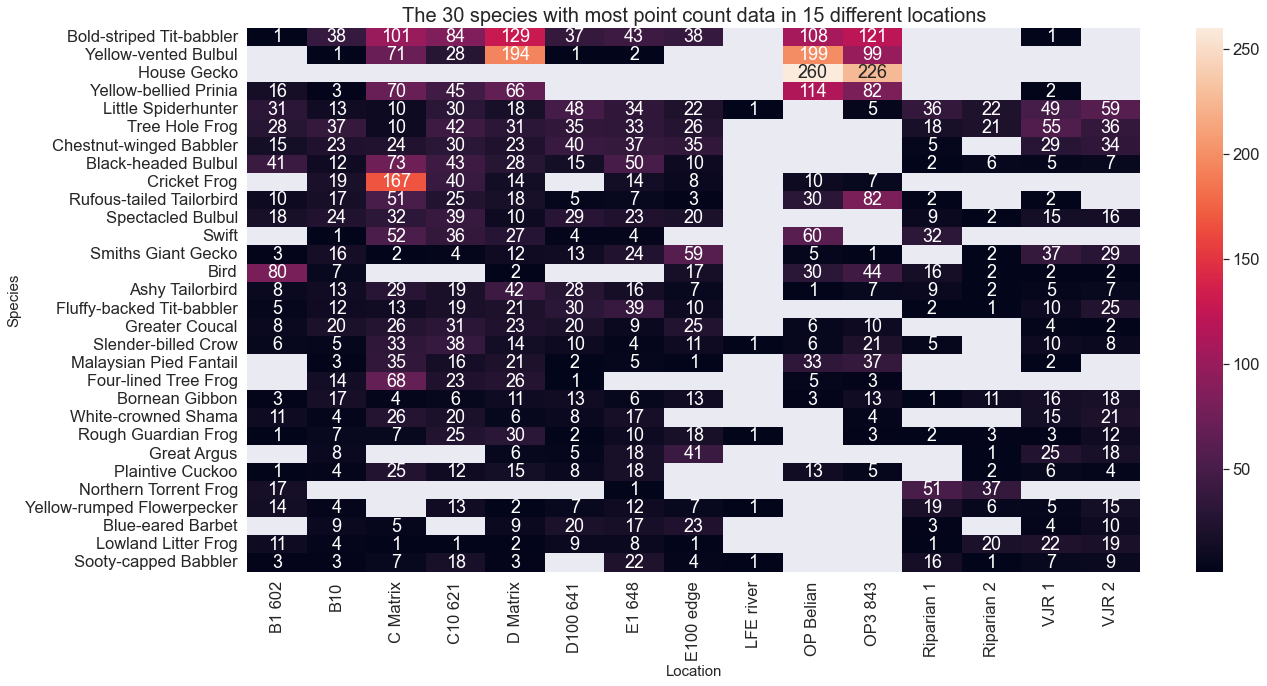

In [1086]:
# Plot heatmap for the 30 species with most point count data
plt.figure(figsize=(20,10))
hp = sns.heatmap(df_heatmap.head(30), annot=True, fmt='g')
hp.set_title("The 30 species with most point count data in 15 different locations", fontsize=20)
hp.set_xlabel("Location",fontsize=15)
hp.set_ylabel("Species",fontsize=15)
plt.show()

Out of the 26 locations I plotted on the map, 15 of them have point count data. Just by looking at the heatmap, it is obvious that the location 'LFE river' has the least data counts. That was also shown when the data was counted for each location in the first Jupyter notebook (it had 31 counts in total). When looking at 'LFE river' on the map plotted, the locations next to it ('LFE 705' and 'LFE 703') are not better either as they have no data at all. However, we cannot come up with a hypothesis about the amount of species present in that area because we do not know if there was truly not many species present in that part of the forest or if it was not observed (either by humans or the microphones) well enough or long enough and as a result no data was collected there.

'D Matrix' looks like the location where the top 2 species - Bold-striped Tit-babbler and Yellow-vented bulbul - had the most counts. While, the third top species, the 'House Gecko' managed to get the 3rd place even though it had data counts in only 2 locations ('OP Belian' and 'OP3 843') which are the furthest locations more or less than the rest of the locations. There might be some hypothesis to come up about where House Geckos are most present by knowing that information, again however, we cannot come up with conclusions as we do not have enough information about the way the data was collected.

'OP Belian' seems to have the most point count data overall for the top 4 species but doesn't have that much data for the rest of the species. In the first Jupyter notebook it came in 4th place for the most data counts in all locations (it had 1160 counts), but was not very far behind the 3rd and 2nd place (only 24 counts less than 'C10 621' which was in 2nd place).

By observing the heatmap, we see the locations with the most consistent brighter colors overall are 'C Matrix' and 'C10 621' and they indeed were the top 2 locations with the most data counts (1302 counts in 'C Matrix' and 1184 counts in 'C10 621').

In [ ]:
df_norm_col=(df-df.mean())/df.std()
sns.heatmap(df_norm_col, cmap='viridis')
plt.show()

## Temporal distribution of the recordings

### What's the time range of the recordings in years?

In [1087]:
# Explore the dataframe
audio.info()
""

""
# Find the setup date range of all the recordings in years and print it
audio["Setup_date"] = pd.to_datetime(audio["Setup_date"])
setup_date_range = "Setup Date Range: " + str(audio["Setup_date"].min()) + " to " + str(audio["Setup_date"].max())
print(setup_date_range)

# Find the collected date range of all the recordings in years and print it
audio["Collect_date"] = pd.to_datetime(audio["Collect_date"])
collect_date_range = "Collect Date Range: " + str(audio["Collect_date"].min()) + " to " + str(audio["Collect_date"].max())
print(collect_date_range)
""

""
# Find the number of days from setup date to collect date for each file
for d in audio:
    days = audio["Collect_date"] - audio["Setup_date"]
    print(days)
    break

""
""
# Find the longest period a microphone was left for
print(days.max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Audio_file     81 non-null     object        
 1   Site           81 non-null     object        
 2   Audio_moth_ID  79 non-null     object        
 3   Tree           65 non-null     object        
 4   Setup_date     81 non-null     datetime64[ns]
 5   Setup_time     75 non-null     object        
 6   Collect_date   79 non-null     datetime64[ns]
 7   Collect_time   77 non-null     object        
dtypes: datetime64[ns](2), object(6)
memory usage: 5.2+ KB


''

''

Setup Date Range: 2018-12-19 00:00:00 to 2019-09-17 00:00:00
Collect Date Range: 2018-12-25 00:00:00 to 2019-10-12 00:00:00


''

''

0     5 days
1     3 days
2    12 days
3     3 days
4     3 days
       ...  
76    4 days
77    8 days
78    8 days
79   25 days
80   25 days
Length: 81, dtype: timedelta64[ns]


''

''

50 days 00:00:00


The first set up date was on the 19th of December, 2018 and the last collect date was on the 12th of October 2019. The longest number of days a microphones was left for was 50 days. This dataframe doesn't seem to show the dates of all of the data collected. I will explore the time range of the recordings using the Point_count_recordings dataset.

In [1088]:
# Find date range of all the recordings and print it
date_range = str(pcr["Date"].min()) + " to " + str(pcr["Date"].max())
print(date_range)

2018-03-06 00:00:00 to 2020-02-03 00:00:00


The first audio file was recorded on the 6th of March, 2018 and the last audio file was recorded on the 3rd of February, 2020. Approximately 2 years of recordings was done.

## How is the point count data of the top 3 species distributed over time?

I want to explore when the 3 species with the most point count data where observed during the years, as well as during the time of day. This could allow us to see during which months and at which times during the day, these 3 species are more likely to be spotted. 
The 3 species are the Bold-striped Tit-Babbler, Yellow-vented Bulbul, and House Gecko.

### Clean the data:

I will use the 'Time_of_day' column in the 'Point Count Data' (pcd) dataframe to look at the distribution over the time of day. And I will use the 'Date' column in the 'Point Count Recordings' (pcr) dataframe to look at the distribution over the year.

But first, I need to clean the dataframes to only include the top 3 species.

In [1089]:
# Filter the dataframe with the top 3 species
species_filter = pcd["Species_common_name"].isin(["Bold-striped Tit-babbler", "Yellow-vented Bulbul", "House Gecko"])
# Save dataframe with only rows containing the Bold-striped Tit-babbler, Yellow-vented Bulbul, and House Gecko
pcd = pcd[species_filter].reset_index(drop=True)
# Display dataframe
pcd

,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual
0,18_03_06_1,E100 edge,Bold-striped Tit-babbler,50.0,00:02:17,10:17:17,A
1,18_03_06_1,E100 edge,Bold-striped Tit-babbler,50.0,00:02:17,10:17:17,A
2,18_03_07_1,D100 641,Bold-striped Tit-babbler,50.0,00:04:36,09:19:36,A
3,18_03_08_1,C10 621,Bold-striped Tit-babbler,25.0,00:00:11,10:00:11,A
4,18_03_08_1,C10 621,Bold-striped Tit-babbler,30.0,00:02:23,10:02:23,A
...,...,...,...,...,...,...,...
1777,19_11_28_06,OP3 843,Yellow-vented Bulbul,25.0,00:02:31,11:02:31,A
1778,19_11_28_06,OP3 843,Bold-striped Tit-babbler,30.0,00:08:04,11:08:04,A
1779,19_12_02_01,OP Belian,Yellow-vented Bulbul,15.0,00:00:30,18:00:30,A
1780,19_12_02_01,OP Belian,Yellow-vented Bulbul,15.0,00:01:59,18:01:59,A


Since the 'Point count recordings' dataframe doesn't have the species names in it, I will have to split the species in separate dataframes and then match them with the 'Point count recordings' dataframe using the 'Point_count_ID' column.

In [1090]:
## Split species into 3 separate dataframes

# Create Bold-striped Tit-Babbler dataframe
bold_striped = pcd["Species_common_name"].isin(["Bold-striped Tit-babbler"])
bold_striped = pcd[bold_striped]

# Create Yellow-vented Bulbul dataframe
yellow_vented = pcd["Species_common_name"].isin(["Yellow-vented Bulbul"])
yellow_vented = pcd[yellow_vented].reset_index(drop=True)

# Create House Gecko dataframe
house_gecko = pcd["Species_common_name"].isin(["House Gecko"])
house_gecko = pcd[house_gecko].reset_index(drop=True)

# Display first few rows of each dataframe
bold_striped.head()
yellow_vented.head()
house_gecko.head()

,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual
0,18_03_06_1,E100 edge,Bold-striped Tit-babbler,50.0,00:02:17,10:17:17,A
1,18_03_06_1,E100 edge,Bold-striped Tit-babbler,50.0,00:02:17,10:17:17,A
2,18_03_07_1,D100 641,Bold-striped Tit-babbler,50.0,00:04:36,09:19:36,A
3,18_03_08_1,C10 621,Bold-striped Tit-babbler,25.0,00:00:11,10:00:11,A
4,18_03_08_1,C10 621,Bold-striped Tit-babbler,30.0,00:02:23,10:02:23,A


,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual
0,18_03_16_1,D Matrix,Yellow-vented Bulbul,NaN,00:03:50,09:03:50,V
1,18_03_16_1,D Matrix,Yellow-vented Bulbul,NaN,00:03:50,09:03:50,V
2,18_03_16_1,D Matrix,Yellow-vented Bulbul,NaN,00:03:50,09:03:50,V
3,18_03_16_1,D Matrix,Yellow-vented Bulbul,NaN,00:17:31,09:17:31,V
4,18_03_16_1,D Matrix,Yellow-vented Bulbul,NaN,00:17:31,09:17:31,V


,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time_of_day,Audio_visual
0,18_08_21_1,OP3 843,House Gecko,NaN,00:05:03,16:08:03,A
1,18_09_04_1,OP Belian,House Gecko,10.0,00:01:10,11:05:10,A
2,18_09_04_2,OP Belian,House Gecko,20.0,00:18:52,12:18:52,A
3,18_09_04_4,OP Belian,House Gecko,10.0,00:05:34,14:05:34,A
4,18_09_08_1,OP3 843,House Gecko,5.0,00:19:52,16:19:52,A


In [1091]:
# Save the unique values in Point_count_ID from each species' 'Point count data' dataframes
bold_striped = bold_striped.Point_count_ID.unique()
yellow_vented = yellow_vented.Point_count_ID.unique()
house_gecko = house_gecko.Point_count_ID.unique()

# Filter the Point_count_IDs in the Point_count_recordings dataframe to only include the ones in each species' Point_count_ID lists
bold_striped_id = pcr[pcr["Point_count_ID"].isin(bold_striped)].reset_index(drop=True)
yellow_vented_id = pcr[pcr["Point_count_ID"].isin(yellow_vented)].reset_index(drop=True)
house_gecko_id = pcr[pcr["Point_count_ID"].isin(house_gecko)].reset_index(drop=True)

# Check there are no duplicates
bold_striped_id.Point_count_ID.duplicated().sum()
yellow_vented_id.Point_count_ID.duplicated().sum()
house_gecko_id.Point_count_ID.duplicated().sum()

# Display the dataframes
bold_striped_id
yellow_vented_id
house_gecko_id

0

0

0

,Point_count_ID,Audio_file,Site,Date,Time,Weather
0,18_03_06_1,PC0000_0003,E100 edge,2018-03-06,10:15:00,sun
1,18_03_07_1,PC0000_0009,D100 641,2018-03-07,09:15:00,sun
2,18_03_08_1,PC0000_0014,C10 621,2018-03-08,10:00:00,sun
3,18_03_08_2,PC0000_0016,C10 621,2018-03-08,11:00:00,sun
4,18_03_08_3,PC0000_0017,C10 621,2018-03-08,12:00:00,clouded
...,...,...,...,...,...,...
270,19_11_28_03,PC0001_1185,OP3 843,2019-11-28,08:00:00,sun
271,19_11_28_04,PC0001_1186,OP3 843,2019-11-28,09:00:00,sun
272,19_11_28_05,PC0001_1187,OP3 843,2019-11-28,10:00:00,sun
273,19_11_28_06,PC0001_1188,OP3 843,2019-11-28,11:00:00,sun


,Point_count_ID,Audio_file,Site,Date,Time,Weather
0,18_03_16_1,PC0000_0038,D Matrix,2018-03-16,09:00:00,clouded
1,18_03_16_2,PC0000_0039,D Matrix,2018-03-16,10:00:00,clouded
2,18_03_16_3,PC0000_0041,D Matrix,2018-03-16,11:00:00,sun
3,18_03_16_4,PC0000_0042,D Matrix,2018-03-16,12:00:00,clouded
4,18_03_16_6,PC0000_0044,D Matrix,2018-03-16,14:00:00,clouded
...,...,...,...,...,...,...
139,19_11_28_03,PC0001_1185,OP3 843,2019-11-28,08:00:00,sun
140,19_11_28_04,PC0001_1186,OP3 843,2019-11-28,09:00:00,sun
141,19_11_28_05,PC0001_1187,OP3 843,2019-11-28,10:00:00,sun
142,19_11_28_06,PC0001_1188,OP3 843,2019-11-28,11:00:00,sun


,Point_count_ID,Audio_file,Site,Date,Time,Weather
0,18_08_21_1,PC0001_0198,OP3 843,2018-08-21,16:03:00,sun
1,18_09_04_1,PC0001_0223,OP Belian,2018-09-04,11:04:00,sun
2,18_09_04_2,PC0001_0224,OP Belian,2018-09-04,12:00:00,clouded
3,18_09_04_4,PC0001_0227,OP Belian,2018-09-04,14:00:00,clouded
4,18_09_08_1,PC0001_0236,OP3 843,2018-09-08,16:00:00,NaN
...,...,...,...,...,...,...
128,19_11_15_02,PC0001_1133,OP Belian,2019-11-15,19:00:00,dark
129,19_11_15_03,PC0001_1134,OP Belian,2019-11-15,20:00:00,dark
130,19_11_15_04,PC0001_1135,OP Belian,2019-11-15,21:00:00,dark
131,19_11_15_05,PC0001_1136,OP Belian,2019-11-15,22:00:00,dark


There are less rows in the dataframes than the number of counts each species has because not all counts have been recorded or have audio data.

### Distribution over the year:

<Figure size 1800x576 with 0 Axes>

[Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Number of counts for the top 3 species over the years')]

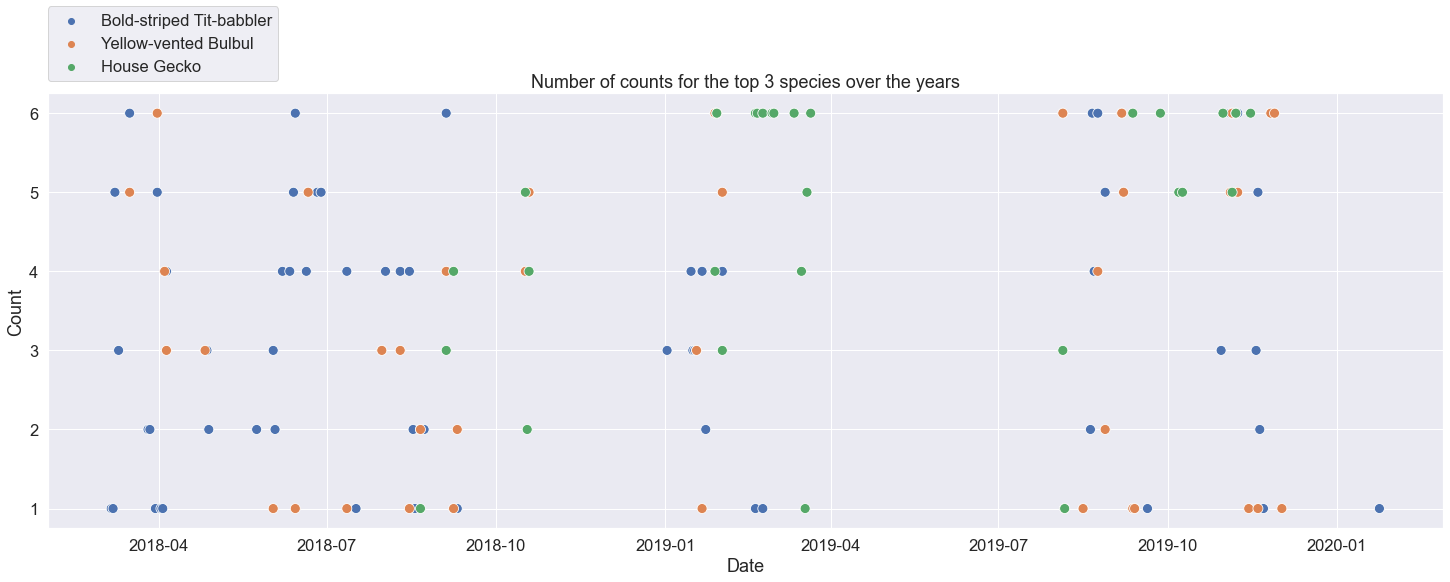

In [1092]:
## Plot the top 3 species count data over the years

# Group each species by Date and count number of point count audio files
bold_striped_plot = bold_striped_id.groupby(['Date'])['Point_count_ID'].count()
yellow_vented_plot = yellow_vented_id.groupby(['Date'])['Point_count_ID'].count()
house_gecko_plot = house_gecko_id.groupby(['Date'])['Point_count_ID'].count()

# Save each series to a dataframe
bold_striped_df = bold_striped_plot.to_frame().reset_index()
yellow_vented_df = yellow_vented_plot.to_frame().reset_index()
house_gecko_df = house_gecko_plot.to_frame().reset_index()

# Concatenate the dataframes while assigning a 'Dataset' column to distinguish which rows came from which dataframe
concatenated = pd.concat([bold_striped_df.assign(Dataset='Bold-striped Tit-babbler'), 
                          yellow_vented_df.assign(Dataset='Yellow-vented Bulbul'),
                          house_gecko_df.assign(Dataset='House Gecko')])

# Plot a scatter plot of the dataframe
plt.figure(figsize=(25,8))
sns.set(font_scale=1.5)
sns.scatterplot(data=concatenated, x='Date', y='Point_count_ID', hue='Dataset', s=100).set(ylabel='Count', 
                                                                                   title="Number of counts for the top 3 species over the years")
plt.legend(bbox_to_anchor=(0, 1.2), loc='upper left', borderaxespad=0)

The scatter plot is not very clear to come up with observations, and the number of counts are number of counts that have audio files or have been recorded, which is not a lot. In addition, there could be more than one count in the same audio file. So, this is also another issue with the data that makes it hard to come up with conclusions. I also tried plotting each species separately in scatterplots, lineplots, as well as bar plots. The bar plot felt like it was the most suitable to display this data, so I will show it in the next cell, but I had issues with reformatting the dates in the x-axis and fixing their intervals and did not have enough time to fix it so that it becomes clearer. I will display it anyway just for the purpose of showing the idea, but it could be improved more if I had more time to work on it. 
Some ways the x-axis can be changed to make it clearer to read/come up with a hypothesis: 
- Changing the formatting of the labels
- Having even intervals in the x-axis ticks
- Grouping the dates by months of each year

<AxesSubplot:title={'center':'Number of counts for Bold-striped Tit-babbler over the years'}, xlabel='Date', ylabel='Count'>

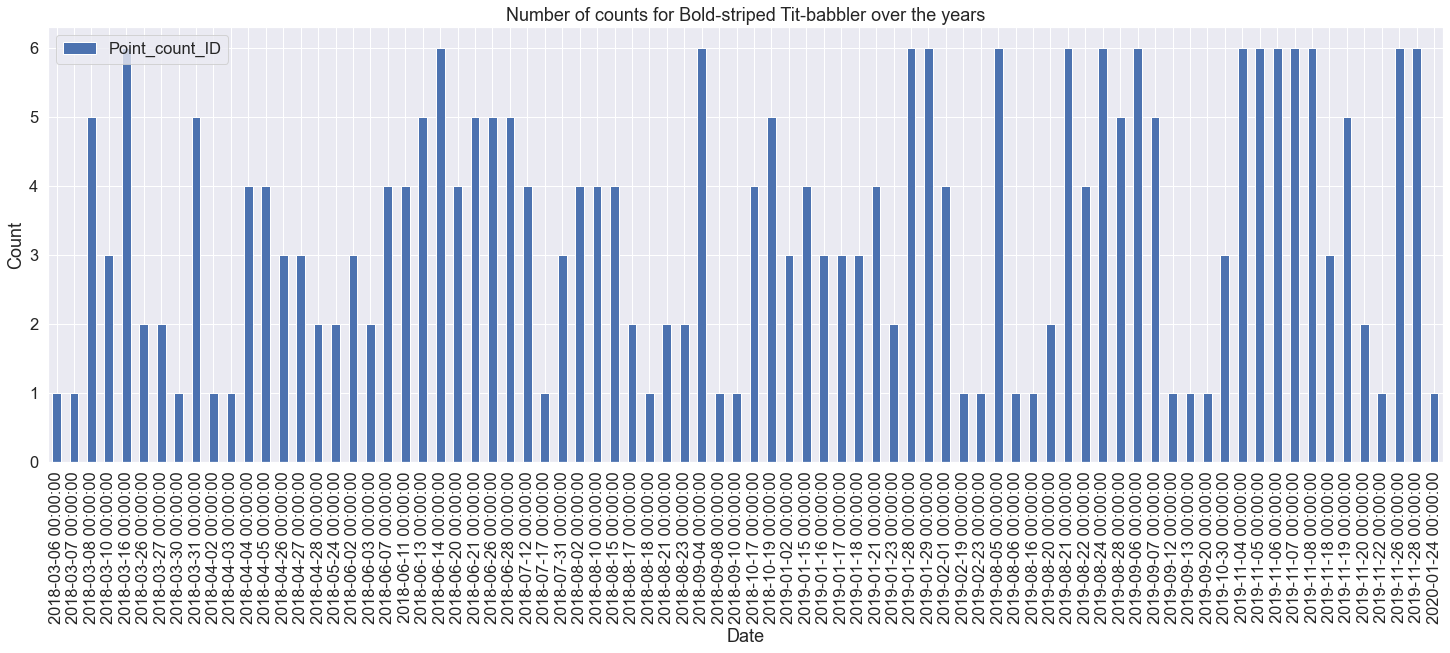

In [1093]:
## Plot a bar plot of each dataframe

# Plot Bold-striped Tit-babbler counts
fig, axs = plt.subplots(figsize=(25, 8))
bold_striped_df.plot(x='Date', y='Point_count_ID', kind='bar', rot=90, ax=axs, 
                      title="Number of counts for Bold-striped Tit-babbler over the years", ylabel='Count')

<AxesSubplot:title={'center':'Number of counts for Yellow-vented Bulbul over the years'}, xlabel='Date', ylabel='Count'>

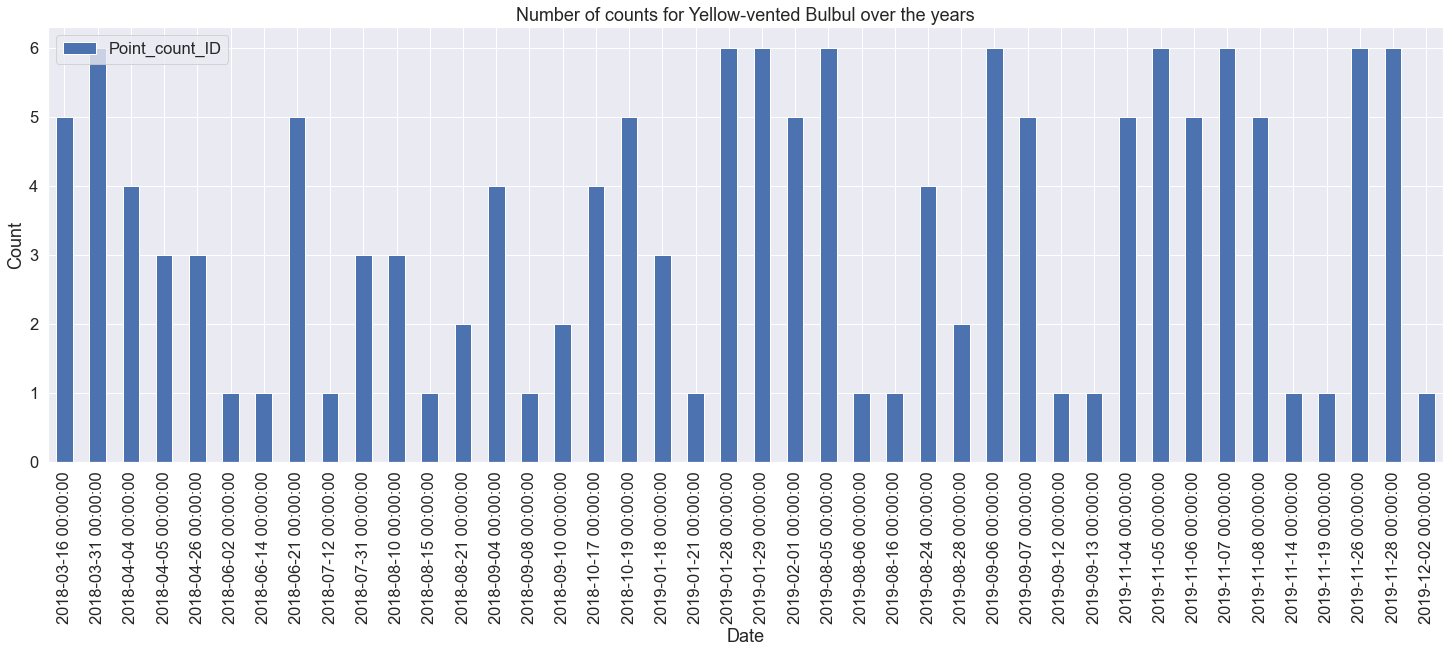

In [1094]:
# Plot Yellow-vented Bulbul counts
fig, axs = plt.subplots(figsize=(25, 8))
yellow_vented_df.plot(x='Date', y='Point_count_ID', kind='bar', rot=90, ax=axs, 
                      title="Number of counts for Yellow-vented Bulbul over the years", ylabel='Count')

<AxesSubplot:title={'center':'Number of counts for House-Gecko over the years'}, xlabel='Date', ylabel='Count'>

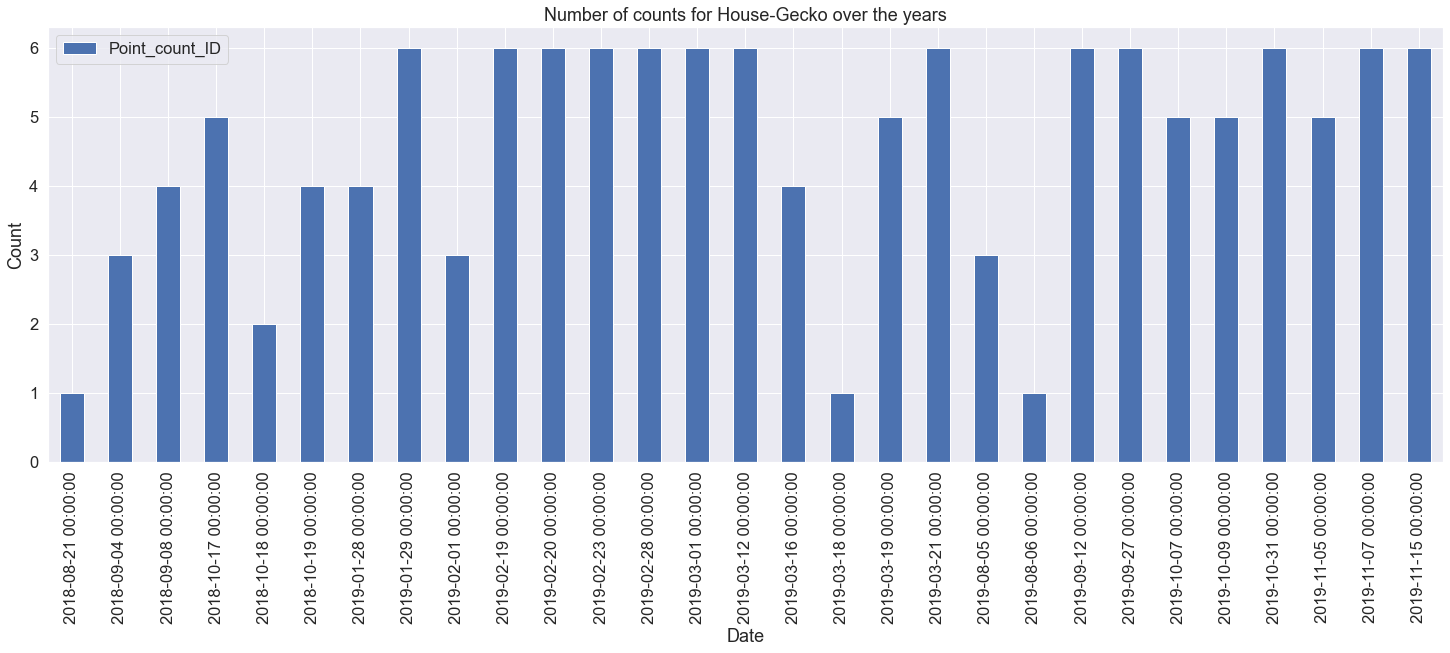

In [1095]:
# Plot House-Gecko counts
fig, axs = plt.subplots(figsize=(25, 8))
house_gecko_df.plot(x='Date', y='Point_count_ID', kind='bar', rot=90, ax=axs, 
                      title="Number of counts for House-Gecko over the years", ylabel='Count')

There are no obvious patterns in these plots, especially with the low number of counts, and the problem of the counts not being accurate as these counts refer to audio files which could contain more than one count. Therefore, it is hard to come up with hypotheses about it.

### Distribution over the time of day:

#### Subsetting species observation by time of day point counts occurred

The time of day might be a factor in the species' appearances. For example, the birds might be more likely to appear in the morning than at night. I want to group the time at which the species were counted at into categories. The categories are: morning, afternoon, evening,  night, and Null for missing values. Point counts will be assigned to the categories as follows:
- Morning: 6:00 A.M. - 11:59 A.M.
- Afternoon: 12:00 P.M. - 5:59 P.M.
- Evening: 6:00 P.M. - 9:59 P.M.
- Night: 10 P.M. - 5:59 A.M.
- Null: NaN

In [1096]:
## Subsetting the "Time" column into times of day

# Rename column 'Time_of_day' to 'Time'
pcd = pcd.rename(columns={"Time_of_day": "Time"})

pcd["Time"]=pd.to_datetime(pcd["Time"], format='%H:%M:%S')
# Morning
start_time = datetime.strptime('06:00:00', '%H:%M:%S')
end_time = datetime.strptime('11:59:00', '%H:%M:%S')
a = pcd[(pcd['Time'] >= start_time) & (pcd['Time'] <= end_time)]
a["Time_of_Day"] = "Morning"
ab = a[["Time_of_Day"]]

# Afternoon
start_time = datetime.strptime('12:00:00', '%H:%M:%S')
end_time = datetime.strptime('17:59:00', '%H:%M:%S')
b = pcd[(pcd['Time'] >= start_time) & (pcd['Time'] <= end_time)]
b["Time_of_Day"] = 'Afternoon'
bc = b[["Time_of_Day"]]

# Evening 
start_time = datetime.strptime('18:00:00', '%H:%M:%S')
end_time = datetime.strptime('21:59:00', '%H:%M:%S')
c = pcd[(pcd['Time'] >= start_time) & (pcd['Time'] <= end_time)]
c["Time_of_Day"] = "Evening"
cd = c[["Time_of_Day"]]

# Night
start_time = datetime.strptime('22:00:00', '%H:%M:%S')
end_time = datetime.strptime('05:59:00', '%H:%M:%S')
d = pcd[(pcd['Time'] >= start_time)]
e = pcd[(pcd['Time'] <= end_time)]
d["Time_of_Day"] = "Night"
de = d[["Time_of_Day"]]
e["Time_of_Day"] = "Night"
ef = e[["Time_of_Day"]]

# Format 'Time' column again to return it without dates as it originally was
pcd["Time"]=pd.to_datetime(pcd["Time"], format='%H:%M:%S').dt.time

# Concatenate the subsets
frames = (ab,bc,cd,de,ef)
result = pd.concat(frames)

pcd_loc_subset=pd.concat([pcd, result],axis=1).reindex(pcd.index)
pcd_loc_subset

C:\Users\DELL\AppData\Local\Temp/ipykernel_8024/1642576438.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["Time_of_Day"] = "Morning"
C:\Users\DELL\AppData\Local\Temp/ipykernel_8024/1642576438.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b["Time_of_Day"] = 'Afternoon'
C:\Users\DELL\AppData\Local\Temp/ipykernel_8024/1642576438.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,Point_count_ID,Site,Species_common_name,Est_distance,PC_time,Time,Audio_visual,Time_of_Day
0,18_03_06_1,E100 edge,Bold-striped Tit-babbler,50.0,00:02:17,10:17:17,A,Morning
1,18_03_06_1,E100 edge,Bold-striped Tit-babbler,50.0,00:02:17,10:17:17,A,Morning
2,18_03_07_1,D100 641,Bold-striped Tit-babbler,50.0,00:04:36,09:19:36,A,Morning
3,18_03_08_1,C10 621,Bold-striped Tit-babbler,25.0,00:00:11,10:00:11,A,Morning
4,18_03_08_1,C10 621,Bold-striped Tit-babbler,30.0,00:02:23,10:02:23,A,Morning
...,...,...,...,...,...,...,...,...
1777,19_11_28_06,OP3 843,Yellow-vented Bulbul,25.0,00:02:31,11:02:31,A,Morning
1778,19_11_28_06,OP3 843,Bold-striped Tit-babbler,30.0,00:08:04,11:08:04,A,Morning
1779,19_12_02_01,OP Belian,Yellow-vented Bulbul,15.0,00:00:30,18:00:30,A,Evening
1780,19_12_02_01,OP Belian,Yellow-vented Bulbul,15.0,00:01:59,18:01:59,A,Evening


<Figure size 1800x576 with 0 Axes>

[Text(0.5, 1.0, "Top 3 species' counts over hours of the day"),
 Text(0.5, 0, 'Time of day (24 hour format)')]

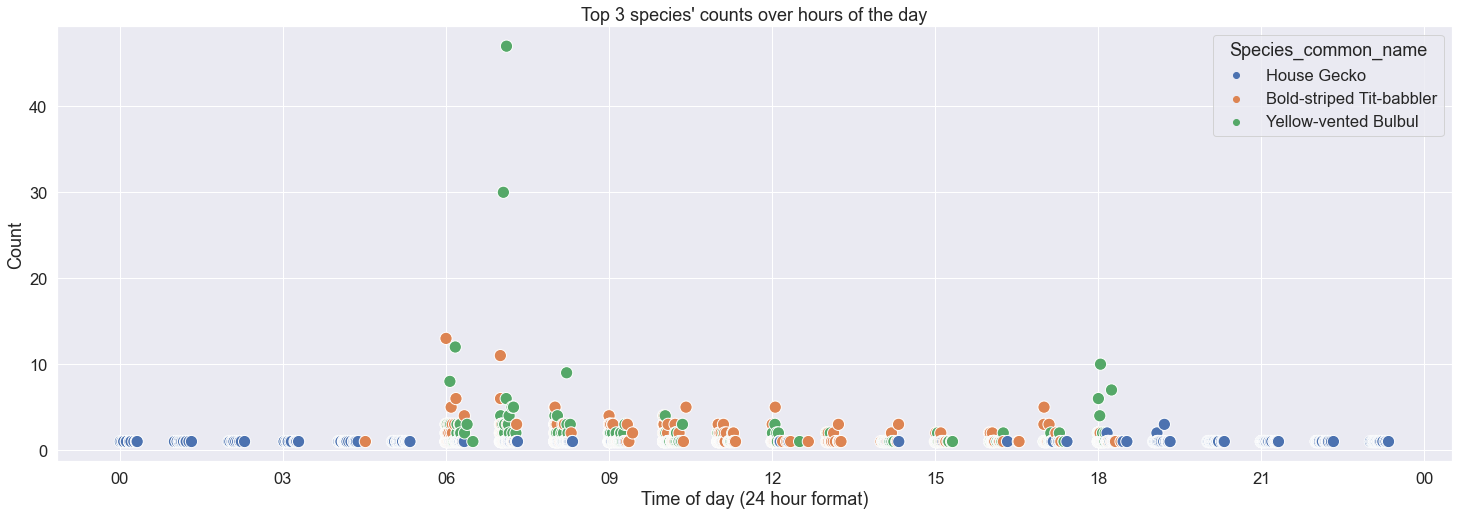

In [1206]:
# Plot the top 3 species' count data over the time of day

# Group each species by time and species and count number of counts
top_species_time = pcd_loc_subset.groupby(['Time', 'Species_common_name'])['Point_count_ID'].count()
top_species_subset = pcd_loc_subset.groupby(['Time_of_Day','Species_common_name'])['Point_count_ID'].count()

# Save each series to a dataframe
top_species_time = top_species_time.to_frame().reset_index()
top_species_subset = top_species_subset.to_frame().reset_index()

# Rename column 'Point_count_ID' to 'Count'
top_species_time = top_species_time.rename(columns={'Point_count_ID': "Count"})
top_species_subset = top_species_subset.rename(columns={'Point_count_ID': "Count"})

# Convert 'Time' column to string
top_species_time['Time'] = pd.to_datetime(top_species_time['Time'].astype(str))

# Convert to timestamp
top_species_time['Time'] = top_species_time['Time'].apply(pd.Timestamp)



xformatter = mdates.DateFormatter('%H')

# Plot scatter plot
plt.figure(figsize=(25,8))
sns.set(font_scale=1.5)
top_species = sns.scatterplot(data=top_species_time, x='Time', y='Count', hue='Species_common_name', s=150)
top_species.xaxis.set_major_formatter(xformatter)
top_species.set(title="Top 3 species' counts over hours of the day", xlabel='Time of day (24 hour format)')


<Figure size 1800x576 with 0 Axes>

[Text(0.5, 1.0, "Top 3 species' counts over subsets of the day")]

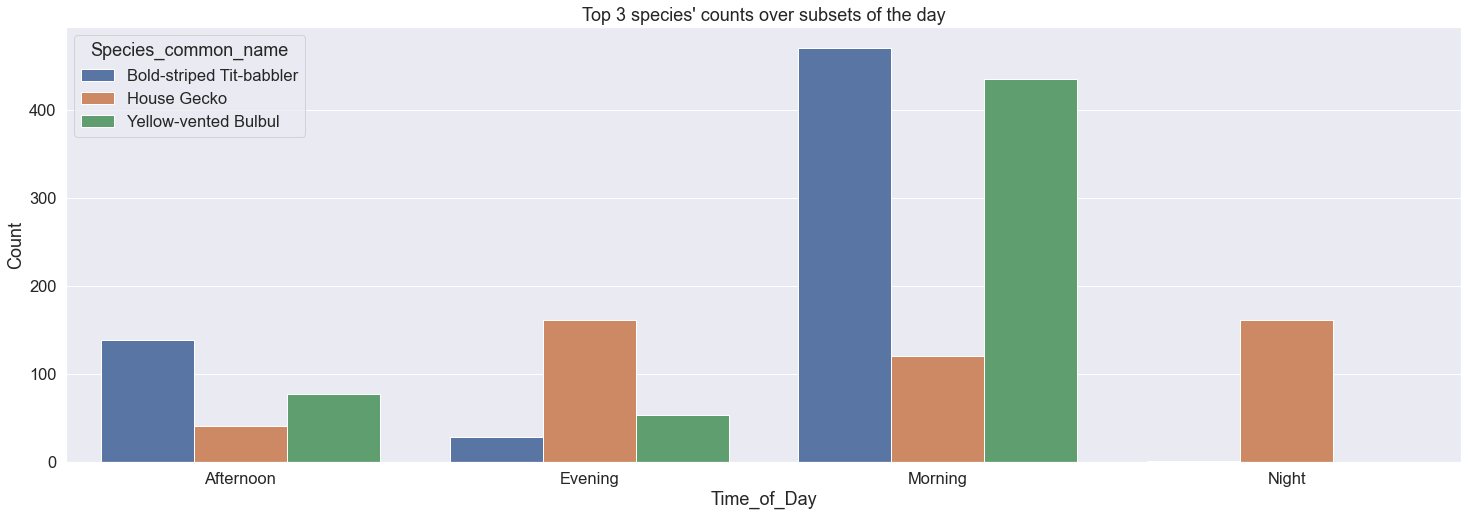

In [1205]:
# Plot the top 3 species' count data over the categories of time of day
plt.figure(figsize=(25,8))
sns.barplot(data=top_species_subset, x="Time_of_Day", y="Count", hue="Species_common_name").set(title="Top 3 species' counts over subsets of the day")

The birds (Bold-striped Tit-babbler and Yellow-vented Bulbul) have the most counts in the morning between 6AM and 11:59AM. And they decrease significantly after that, with no counts at all from 10PM until 5:59AM. It is not a surprise as most birds are more active in the morning. However these times could also slightly change depending on the time of the year (summer vs. winter). The House-Gecko has the most counts during the evening and is the only one that has counts during the night, and that's not a surprise either considering it is a noctornal species. However, though it seems most active during the evening and night, its counts are not that much higher at those times than they are in the morning, but that could also be because this dataset doesn't have a lot of counts. 